In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
unemployment_init = pd.read_csv('./datasets/Adwaith/Original datasets/unemployment.csv')
unemployment = pd.DataFrame()
unemployment_init

,Date,Unemployment
0,1971 FEB,3.8
1,1971 MAR,3.9
2,1971 APR,4.0
3,1971 MAY,4.1
4,1971 JUN,4.1
...,...,...
621,2022 NOV,3.7
622,2022 DEC,3.7
623,2023 JAN,3.8
624,2023 FEB,3.8


In [3]:
unemployment_init['Date'] = pd.to_datetime(unemployment_init['Date'])
unemployment['Date'] = unemployment_init['Date']
unemployment['Month'] = unemployment_init['Date'].dt.month
unemployment['Year'] = unemployment_init['Date'].dt.year
unemployment['Unemployment'] = unemployment_init['Unemployment']
unemployment

,Date,Month,Year,Unemployment
0,1971-02-01,2,1971,3.8
1,1971-03-01,3,1971,3.9
2,1971-04-01,4,1971,4.0
3,1971-05-01,5,1971,4.1
4,1971-06-01,6,1971,4.1
...,...,...,...,...
621,2022-11-01,11,2022,3.7
622,2022-12-01,12,2022,3.7
623,2023-01-01,1,2023,3.8
624,2023-02-01,2,2023,3.8


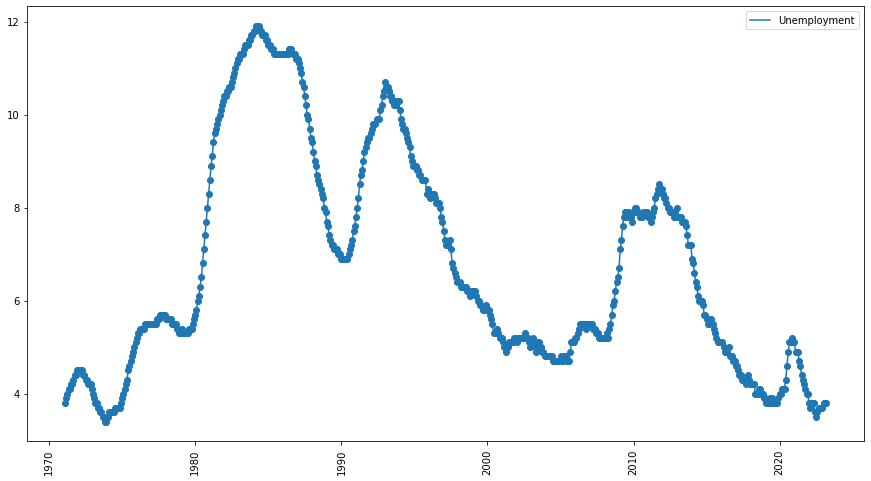

In [4]:
mean = unemployment['Unemployment'].mean()
std = unemployment['Unemployment'].std()
unemployment['Unemployment_Norm'] = unemployment['Unemployment'].apply(lambda x: (x-mean)/std)
unemployment


fig, axes = plt.subplots(1, 1, figsize=(15, 8))
axes.plot(unemployment['Date'], unemployment['Unemployment'], label='Unemployment')
axes.scatter(unemployment['Date'], unemployment['Unemployment'])
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [5]:
unemployment['Unemployment_Norm_Diff'] = unemployment['Unemployment_Norm'].diff()
unemployment = unemployment.loc[unemployment['Year'] > 2012]
unemployment

,Date,Month,Year,Unemployment,Unemployment_Norm,Unemployment_Norm_Diff
503,2013-01-01,1,2013,8.0,0.529790,0.083845
504,2013-02-01,2,2013,7.8,0.445945,-0.083845
505,2013-03-01,3,2013,7.8,0.445945,0.000000
506,2013-04-01,4,2013,7.8,0.445945,0.000000
507,2013-05-01,5,2013,7.7,0.404022,-0.041922
...,...,...,...,...,...,...
621,2022-11-01,11,2022,3.7,-1.272875,0.000000
622,2022-12-01,12,2022,3.7,-1.272875,0.000000
623,2023-01-01,1,2023,3.8,-1.230953,0.041922
624,2023-02-01,2,2023,3.8,-1.230953,0.000000


## First order differencing is adequate.

In [6]:
result = adfuller(unemployment['Unemployment_Norm_Diff'].values)
print(result)

(-5.300602556871396, 5.4599382212595416e-06, 1, 121, {'1%': -3.485585145896754, '5%': -2.885738566292665, '10%': -2.5796759080663887}, -395.4977226911808)


In [7]:
for i in range(1,13):
    unemployment[f'Unemployment_Norm_Diff_lag_{i}'] = unemployment['Unemployment_Norm_Diff'].shift(i)  

C:\Users\je1g19\AppData\Local\Temp\ipykernel_88\820241576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment[f'Unemployment_Norm_Diff_lag_{i}'] = unemployment['Unemployment_Norm_Diff'].shift(i)
C:\Users\je1g19\AppData\Local\Temp\ipykernel_88\820241576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment[f'Unemployment_Norm_Diff_lag_{i}'] = unemployment['Unemployment_Norm_Diff'].shift(i)
C:\Users\je1g19\AppData\Local\Temp\ipykernel_88\820241576.py:2: SettingWithCopyWarning: 
A value

In [8]:
unemployment = unemployment.loc[unemployment['Year'] > 2013]
unemployment = unemployment.drop([515,516])
unemployment = unemployment.reset_index()
unemployment = unemployment.drop(columns=['index'])
unemployment

,Date,Month,Year,Unemployment,Unemployment_Norm,Unemployment_Norm_Diff,Unemployment_Norm_Diff_lag_1,Unemployment_Norm_Diff_lag_2,Unemployment_Norm_Diff_lag_3,Unemployment_Norm_Diff_lag_4,Unemployment_Norm_Diff_lag_5,Unemployment_Norm_Diff_lag_6,Unemployment_Norm_Diff_lag_7,Unemployment_Norm_Diff_lag_8,Unemployment_Norm_Diff_lag_9,Unemployment_Norm_Diff_lag_10,Unemployment_Norm_Diff_lag_11,Unemployment_Norm_Diff_lag_12
0,2014-03-01,3,2014,6.6,-0.057124,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,0.000000,0.000000,-0.041922,0.000000,0.000000
1,2014-04-01,4,2014,6.4,-0.140969,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,0.000000,0.000000,-0.041922,0.000000
2,2014-05-01,5,2014,6.3,-0.182892,-0.041922,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,0.000000,0.000000,-0.041922
3,2014-06-01,6,2014,6.1,-0.266737,-0.083845,-0.041922,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,0.000000,0.000000
4,2014-07-01,7,2014,6.0,-0.308659,-0.041922,-0.083845,-0.041922,-0.083845,-0.083845,-0.041922,-0.125767,0.000000,0.000000,-0.083845,-0.083845,-0.041922,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2022-11-01,11,2022,3.7,-1.272875,0.000000,0.000000,0.041922,0.041922,-0.041922,-0.083845,0.000000,0.000000,0.041922,-0.041922,-0.083845,0.000000,-0.041922
105,2022-12-01,12,2022,3.7,-1.272875,0.000000,0.000000,0.000000,0.041922,0.041922,-0.041922,-0.083845,0.000000,0.000000,0.041922,-0.041922,-0.083845,0.000000
106,2023-01-01,1,2023,3.8,-1.230953,0.041922,0.000000,0.000000,0.000000,0.041922,0.041922,-0.041922,-0.083845,0.000000,0.000000,0.041922,-0.041922,-0.083845
107,2023-02-01,2,2023,3.8,-1.230953,0.000000,0.041922,0.000000,0.000000,0.000000,0.041922,0.041922,-0.041922,-0.083845,0.000000,0.000000,0.041922,-0.041922


In [9]:
unemployment.to_csv('./datasets/Adwaith/unemployment_dataset.csv')

In [10]:
gdp_init = pd.read_csv('./datasets/Adwaith/Original datasets/gdp.csv')
gdp_init['Date'] = gdp_init['Date'].apply(lambda x: "-".join(x.split(" ")))
# convert the date column to datetime format
gdp_init['Date'] = pd.to_datetime(gdp_init['Date'])


gdp_init['Month'] = gdp_init['Date'].dt.month
gdp_init['Year'] = gdp_init['Date'].dt.year

gdp_init


,Date,GDP,Month,Year
0,1955-01-01,129428,1,1955
1,1955-04-01,129519,4,1955
2,1955-07-01,132043,7,1955
3,1955-10-01,131396,10,1955
4,1956-01-01,132998,1,1956
...,...,...,...,...
267,2021-10-01,554821,10,2021
268,2022-01-01,557524,1,2022
269,2022-04-01,557810,4,2022
270,2022-07-01,557286,7,2022


In [11]:
# convert the date column to datetime format
gdp_init['Date'] = pd.to_datetime(gdp_init['Date'])

# set the date column as index
gdp_init.set_index('Date', inplace=True)

# create a dataframe over the range from 2013-2023
temp_fash = pd.DataFrame()
date_range = pd.date_range(start='2013-01-01', end='2023-05-05', freq='M')
temp_fash['Date'] = date_range
temp_fash['Month'] = temp_fash['Date'].dt.month
temp_fash['Year'] = temp_fash['Date'].dt.year
temp_fash.drop('Date', axis=1, inplace=True)

# set datetime in temp_fash from month and year
temp_fash['Date'] = pd.to_datetime(temp_fash['Year'].astype(str) + temp_fash['Month'].astype(str), format='%Y%m')

# merge the two datasets based on the year and month
gdp_interp = pd.merge(gdp_init, temp_fash, how='outer', on=['Month','Year'])
gdp_interp = gdp_interp.sort_values(by=["Year", 'Month'])


gdp_interp = gdp_interp.loc[gdp_interp['Year'] > 2012]
gdp_interp.reset_index(drop=True, inplace=True)
gdp_interp['GDP'] = gdp_interp['GDP'].interpolate(method='polynomial', order=2).round(1)
gdp_interp['GDP'] = gdp_interp['GDP'].fillna(method='ffill')

gdp_interp


,GDP,Month,Year,Date
0,484555.0,1,2013,2013-01-01
1,485587.4,2,2013,2013-02-01
2,486684.1,3,2013,2013-03-01
3,487845.0,4,2013,2013-04-01
4,489070.1,5,2013,2013-05-01
...,...,...,...,...
119,558005.0,12,2022,2022-12-01
120,558005.0,1,2023,2023-01-01
121,558005.0,2,2023,2023-02-01
122,558005.0,3,2023,2023-03-01


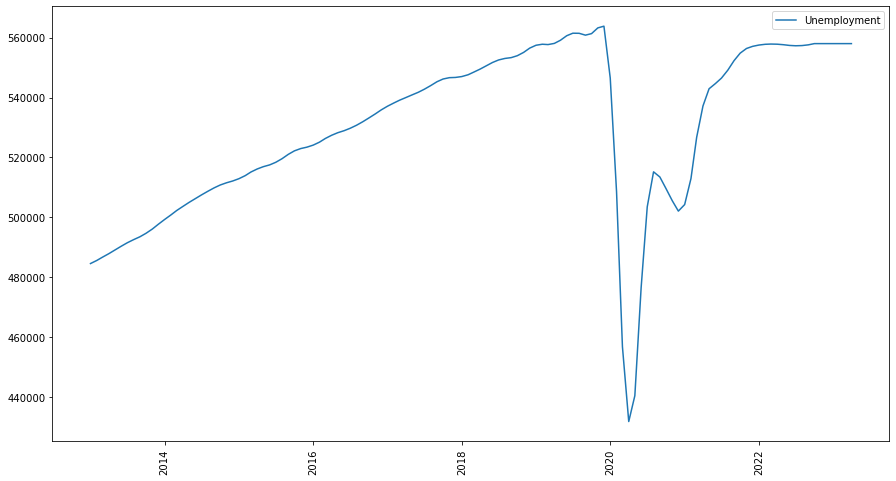

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
axes.plot(gdp_interp['Date'], gdp_interp['GDP'], label='Unemployment')

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [13]:
mean = gdp_interp['GDP'].mean()
std = gdp_interp['GDP'].std()
gdp_interp['GDP_Norm'] = gdp_interp['GDP'].apply(lambda x: (x-mean)/std)
gdp_interp


,GDP,Month,Year,Date,GDP_Norm
0,484555.0,1,2013,2013-01-01,-1.654509
1,485587.4,2,2013,2013-02-01,-1.616881
2,486684.1,3,2013,2013-03-01,-1.576910
3,487845.0,4,2013,2013-04-01,-1.534599
4,489070.1,5,2013,2013-05-01,-1.489948
...,...,...,...,...,...
119,558005.0,12,2022,2022-12-01,1.022502
120,558005.0,1,2023,2023-01-01,1.022502
121,558005.0,2,2023,2023-02-01,1.022502
122,558005.0,3,2023,2023-03-01,1.022502


In [14]:
gdp_interp['GDP_Norm_Diff'] = gdp_interp['GDP_Norm'].diff()
gdp_interp.drop([0], inplace=True)
gdp_interp.reset_index(inplace=True,drop=True)
gdp_interp

,GDP,Month,Year,Date,GDP_Norm,GDP_Norm_Diff
0,485587.4,2,2013,2013-02-01,-1.616881,0.037628
1,486684.1,3,2013,2013-03-01,-1.576910,0.039971
2,487845.0,4,2013,2013-04-01,-1.534599,0.042311
3,489070.1,5,2013,2013-05-01,-1.489948,0.044651
4,490335.7,6,2013,2013-06-01,-1.443821,0.046127
...,...,...,...,...,...,...
118,558005.0,12,2022,2022-12-01,1.022502,0.000000
119,558005.0,1,2023,2023-01-01,1.022502,0.000000
120,558005.0,2,2023,2023-02-01,1.022502,0.000000
121,558005.0,3,2023,2023-03-01,1.022502,0.000000


In [15]:
result = adfuller(gdp_interp['GDP_Norm_Diff'].values)
print(result)

(-3.7433326423475153, 0.0035433208793686677, 13, 109, {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}, -250.33821098033673)


In [16]:
for i in range(1,13):
    gdp_interp[f'GDP_Norm_Diff_lag_{i}'] = gdp_interp['GDP_Norm_Diff'].shift(i)  
    
    
gdp_interp

,GDP,Month,Year,Date,GDP_Norm,GDP_Norm_Diff,GDP_Norm_Diff_lag_1,GDP_Norm_Diff_lag_2,GDP_Norm_Diff_lag_3,GDP_Norm_Diff_lag_4,GDP_Norm_Diff_lag_5,GDP_Norm_Diff_lag_6,GDP_Norm_Diff_lag_7,GDP_Norm_Diff_lag_8,GDP_Norm_Diff_lag_9,GDP_Norm_Diff_lag_10,GDP_Norm_Diff_lag_11,GDP_Norm_Diff_lag_12
0,485587.4,2,2013,2013-02-01,-1.616881,0.037628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,486684.1,3,2013,2013-03-01,-1.576910,0.039971,0.037628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,487845.0,4,2013,2013-04-01,-1.534599,0.042311,0.039971,0.037628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,489070.1,5,2013,2013-05-01,-1.489948,0.044651,0.042311,0.039971,0.037628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,490335.7,6,2013,2013-06-01,-1.443821,0.046127,0.044651,0.042311,0.039971,0.037628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,558005.0,12,2022,2022-12-01,1.022502,0.000000,0.000000,0.015107,0.008733,0.002365,-0.004009,-0.009039,-0.006050,-0.001720,0.002898,0.009247,0.015887,0.025965
119,558005.0,1,2023,2023-01-01,1.022502,0.000000,0.000000,0.000000,0.015107,0.008733,0.002365,-0.004009,-0.009039,-0.006050,-0.001720,0.002898,0.009247,0.015887
120,558005.0,2,2023,2023-02-01,1.022502,0.000000,0.000000,0.000000,0.000000,0.015107,0.008733,0.002365,-0.004009,-0.009039,-0.006050,-0.001720,0.002898,0.009247
121,558005.0,3,2023,2023-03-01,1.022502,0.000000,0.000000,0.000000,0.000000,0.000000,0.015107,0.008733,0.002365,-0.004009,-0.009039,-0.006050,-0.001720,0.002898


In [17]:
gdp_interp = gdp_interp.loc[gdp_interp['Year'] > 2013]
gdp_interp.drop([11,12], inplace=True)
gdp_interp.reset_index(inplace=True,drop=True)
gdp_interp.drop([109], inplace=True)
gdp_interp.reset_index(inplace=True,drop=True)
gdp_interp

C:\Users\je1g19\AppData\Local\Temp\ipykernel_88\379009184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_interp.drop([11,12], inplace=True)
C:\Users\je1g19\AppData\Local\Temp\ipykernel_88\379009184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_interp.drop([109], inplace=True)


,GDP,Month,Year,Date,GDP_Norm,GDP_Norm_Diff,GDP_Norm_Diff_lag_1,GDP_Norm_Diff_lag_2,GDP_Norm_Diff_lag_3,GDP_Norm_Diff_lag_4,GDP_Norm_Diff_lag_5,GDP_Norm_Diff_lag_6,GDP_Norm_Diff_lag_7,GDP_Norm_Diff_lag_8,GDP_Norm_Diff_lag_9,GDP_Norm_Diff_lag_10,GDP_Norm_Diff_lag_11,GDP_Norm_Diff_lag_12
0,502270.0,3,2014,2014-03-01,-1.008855,0.052946,0.055519,0.058129,0.059270,0.051568,0.042391,0.034938,0.037806,0.042398,0.046127,0.044651,0.042311,0.039971
1,503659.0,4,2014,2014-04-01,-0.958231,0.050624,0.052946,0.055519,0.058129,0.059270,0.051568,0.042391,0.034938,0.037806,0.042398,0.046127,0.044651,0.042311
2,504985.4,5,2014,2014-05-01,-0.909888,0.048343,0.050624,0.052946,0.055519,0.058129,0.059270,0.051568,0.042391,0.034938,0.037806,0.042398,0.046127,0.044651
3,506253.0,6,2014,2014-06-01,-0.863688,0.046200,0.048343,0.050624,0.052946,0.055519,0.058129,0.059270,0.051568,0.042391,0.034938,0.037806,0.042398,0.046127
4,507485.0,7,2014,2014-07-01,-0.818786,0.044902,0.046200,0.048343,0.050624,0.052946,0.055519,0.058129,0.059270,0.051568,0.042391,0.034938,0.037806,0.042398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,558005.0,11,2022,2022-11-01,1.022502,0.000000,0.015107,0.008733,0.002365,-0.004009,-0.009039,-0.006050,-0.001720,0.002898,0.009247,0.015887,0.025965,0.056664
105,558005.0,12,2022,2022-12-01,1.022502,0.000000,0.000000,0.015107,0.008733,0.002365,-0.004009,-0.009039,-0.006050,-0.001720,0.002898,0.009247,0.015887,0.025965
106,558005.0,1,2023,2023-01-01,1.022502,0.000000,0.000000,0.000000,0.015107,0.008733,0.002365,-0.004009,-0.009039,-0.006050,-0.001720,0.002898,0.009247,0.015887
107,558005.0,2,2023,2023-02-01,1.022502,0.000000,0.000000,0.000000,0.000000,0.015107,0.008733,0.002365,-0.004009,-0.009039,-0.006050,-0.001720,0.002898,0.009247


In [18]:
gdp_interp.to_csv('./datasets/Adwaith/gdp_dataset.csv')